# MSA 2024 Phase 2 - Part 2

In [132]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from math import sqrt

## 1. Load and split preprocessed data

In [133]:
preprocessed_data = pd.read_csv(r'preprocessed_store_sales.csv', encoding='ISO-8859-1',index_col=False, sep=",", header=0)
print(preprocessed_data.head(10))

X = preprocessed_data.drop(['Sales', 'Postal Code'], axis=1)
y = preprocessed_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Country  City  State  Postal Code  Sub-Category     Sales  Quantity  \
0        0   137     15        42420             0  261.9600         2   
1        0   184      3        90032             2   48.8600         7   
2        0   264     35        19140             1   71.3720         2   
3        0   264     35        19140             2  124.2000         3   
4        0   146     40        77041             0  532.3992         3   
5        0   146     40        77041             1  212.0580         3   
6        0   230     12        47150             2    6.1600         2   
7        0   230     12        47150             1   89.9900         1   
8        0   341     30        12180             1  319.4100         5   
9        0   184      3        90004             2   79.7600         4   

   Discount   Profit  Order Year  ...  Ship Mode_Second Class  \
0      0.00  41.9136        2016  ...                       1   
1      0.00  14.1694        2014  ...                  

## 2. Choose an algorithm

In [134]:
# Model configuration
model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Maximum depth of the trees
    'min_samples_split': [2, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 4]  # Minimum number of samples required at a leaf node
}

# Setup the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score (negative MSE): -14034.048411224518


## 3. Train and test a model

In [135]:

best_model = grid_search.best_estimator_
#predict the training set
train_predictions = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)
train_rmse = sqrt(train_mse)
#predict the test set
test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
test_rmse = sqrt(test_mse)

print(f"Training MSE: {train_mse:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Training RMSE: {train_rmse:.2f}")

print(f"Test MSE: {test_mse:.2f}")
print(f"Test R²: {test_r2:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

Training MSE: 1892.49
Training R²: 0.95
Training RMSE: 43.50
Test MSE: 11855.27
Test R²: 0.64
Test RMSE: 108.88


## 4. Evaluate the model 

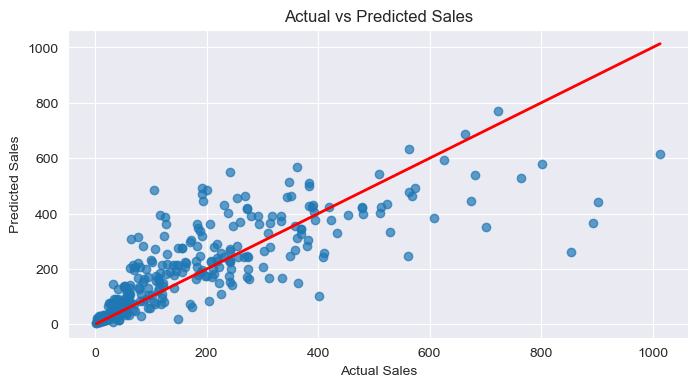

In [136]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 4))
plt.scatter(y_test, test_predictions, alpha=0.7)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.grid(True)
plt.show()

## 5. Summary
Model Selection and Configuration:
A RandomForestRegressor was selected for its robustness in handling both linear and non-linear relationships and its suitability for mixed data types. This model also offers interpretable outputs through feature importance.

Hyperparameter Tuning:
Utilized GridSearchCV to systematically explore various hyperparameters, including the number of trees (n_estimators), tree depth (max_depth), and the minimum samples for splits and leaves. This approach ensured the identification of optimal settings for the model, enhancing its performance.

Training and Evaluation:
The model was rigorously trained using the optimal parameters. Performance on an independent test set was measured using Mean Squared Error (MSE) and R-squared (R²), essential for assessing predictive accuracy and the variance explained by the model.

Results from the Evaluation:
The RandomForestRegressor showed excellent capability on the training set, achieving an R² score of 0.95, indicating a high level of variance explanation. However, the performance on the test dataset showed an R² of 0.64 and a higher MSE, suggesting potential overfitting to the training data.